### Speaking switch with VAD (voice activity detector) 

Paper: https://www.utdallas.edu/ssprl/files/ConferencePaperVADswitch.pdf 

#### 1. VAD options 

    WebRTC VAD https://github.com/wiseman/py-webrtcvad  

    DL VAD https://github.com/hcmlab/vadnet, A Convolutional Neural Network Smartphone App for Real-Time Voice Activity Detection 

#### 2. Data: use data from dns challenge 

    Goals: reproduce this plot (Audacity) 
1. First one, only speech and silence 

    What is the latency on turning on speech? 

2. Then graduate add more noise into it, until when VAD will fail 

    Test limitation of VAD under noise condition 

# 0 Envorinment Set 
#### Step 1: brew install gcc
    If you have the XCode Command Line Tools (they are separate from XCode; you can install them with xcode-select --install) installed
#### Step 2: pip install webrtcvad

In [1]:
# import pakcage and sample 
import soundfile as sf
import numpy as np
import os
import numpy.fft as fft
import matplotlib.pyplot as plt
import webrtcvad
import collections
import contextlib
import sys
import struct

In [2]:
# read and plot the sample sound
# data, sample_rate = sf.read('123.wav') # data: type:np.ndarray, shape: (length, channel)
data, sample_rate = sf.read('__4x1QTjNgc.wav') # data: type:np.ndarray, shape: (length, channel)
# print(samplerate)
# wave_data = data.reshape((2, -1))
# plt.figure()
# plt.subplot(211)
# plt.plot(wave_data[0])
# plt.title("Left channel")
# plt.subplot(212)
# plt.plot(wave_data[1], c="g")
# plt.title("Right channel")
# plt.show()

RuntimeError: Error opening '__4x1QTjNgc.wav': File contains data in an unknown format.

In [51]:
# class Frame(object):
#     def __init__(self, bytes, timestamp, duration):
#         self.bytes = bytes
#         self.timestamp = timestamp
#         self.duration = duration
        
        
# def frame_generator(frame_duration_ms, audio, sample_rate):
#     n = int(sample_rate * (frame_duration_ms / 1000.0) * 2)
#     offset = 0
#     timestamp = 0.0
#     duration = (float(n) / sample_rate) / 2.0
#     while offset + n < len(audio):
#         yield Frame(audio[offset:offset + n], timestamp, duration)
#         timestamp += duration
#         offset += n



# def vad_collector(sample_rate, frame_duration_ms,
#                   padding_duration_ms, vad, frames):
#     num_padding_frames = int(padding_duration_ms / frame_duration_ms)
#     ring_buffer = collections.deque(maxlen=num_padding_frames)
#     triggered = False
#     voiced_frames = []
#     for frame in frames:
#         sys.stdout.write(
#             '1' if vad.is_speech(frame.bytes, sample_rate) else '0')
#         if not triggered:
#             ring_buffer.append(frame)
#             num_voiced = len([f for f in ring_buffer
#                               if vad.is_speech(f.bytes, sample_rate)])
#             if num_voiced > 0.9 * ring_buffer.maxlen:
#                 sys.stdout.write('+(%s)' % (ring_buffer[0].timestamp,))
#                 triggered = True
#                 voiced_frames.extend(ring_buffer)
#                 ring_buffer.clear()
#         else:
#             voiced_frames.append(frame)
#             ring_buffer.append(frame)
#             num_unvoiced = len([f for f in ring_buffer
#                                 if not vad.is_speech(f.bytes, sample_rate)])
#             if num_unvoiced > 0.9 * ring_buffer.maxlen:
#                 sys.stdout.write('-(%s)' % (frame.timestamp + frame.duration))
#                 triggered = False
#                 yield b''.join([f.bytes for f in voiced_frames])
#                 ring_buffer.clear()
#                 voiced_frames = []
#     if triggered:
#         sys.stdout.write('-(%s)' % (frame.timestamp + frame.duration))
#     sys.stdout.write('\n')
#     if voiced_frames:
#         yield b''.join([f.bytes for f in voiced_frames])
 

# samples = wave_data[0] # only keep the left channel
# vad = webrtcvad.Vad()
# vad.set_mode(3)
# frames = frame_generator(30, audio, sample_rate)
# frames = list(frames)
# segments = vad_collector(sample_rate, 30, 300, vad, frames)

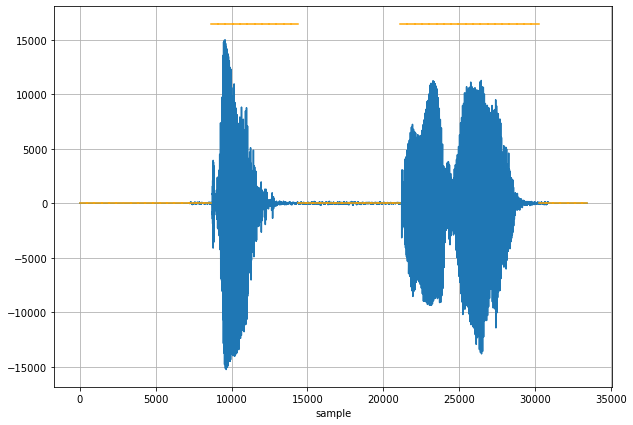

In [106]:
# samples = wave_data[1] # only keep the left channel
from scipy.io import wavfile
sample_rate, samples = wavfile.read('123.wav')
# print(samples.shape)
# print(raw_samples)
raw_samples = struct.pack("%dh" % len(samples), *samples)
vad = webrtcvad.Vad()
vad.set_mode(3)
window_duration = 0.03
samples_per_window = int(window_duration * sample_rate + 0.4)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample],
                              sample_rate = sample_rate)
#     print(is_speech)
    segments.append(dict(start = start,
                         stop = stop,
                         is_speech = is_speech))
plt.figure(figsize = (10,7))
plt.plot(samples)
ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')
    else:
         plt.plot([ segment['start'], segment['stop'] - 1], [0,0], color = 'orange')
plt.xlabel('sample')
plt.grid()

(33440,) 14991 -15264


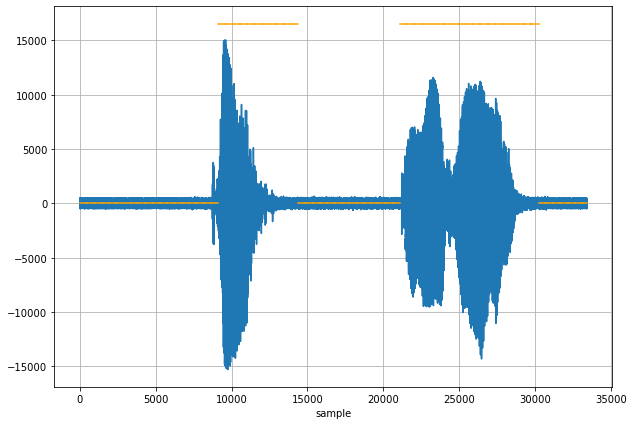

In [107]:
from scipy.io import wavfile
sample_rate, samples = wavfile.read('123.wav')
print(samples.shape,max(samples),min(samples))
noise = np.random.randint(-500,500,size=len(samples))
samples = samples + noise
# print(raw_samples)
raw_samples = struct.pack("%dh" % len(samples), *samples)
vad = webrtcvad.Vad()
vad.set_mode(3)
window_duration = 0.03
samples_per_window = int(window_duration * sample_rate + 0.4)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample],
                              sample_rate = sample_rate)
#     print(is_speech)
    segments.append(dict(start = start,
                         stop = stop,
                         is_speech = is_speech))
plt.figure(figsize = (10,7))
plt.plot(samples)
ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')
    else:
         plt.plot([ segment['start'], segment['stop'] - 1], [0,0], color = 'orange')
plt.xlabel('sample')
plt.grid()

(33440,) 14991 -15264


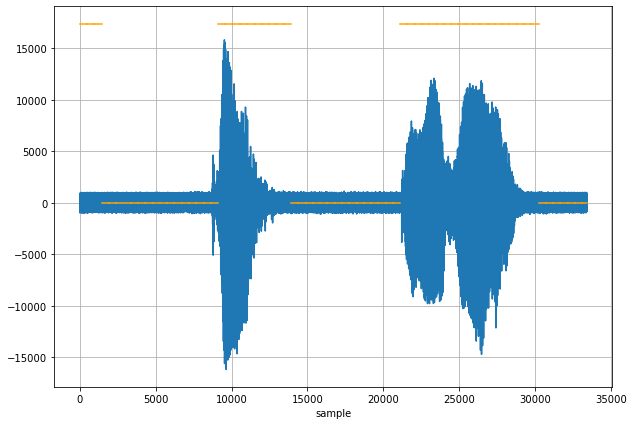

In [104]:
from scipy.io import wavfile
sample_rate, samples = wavfile.read('123.wav')
print(samples.shape,max(samples),min(samples))
noise = np.random.randint(-1000,1000,size=len(samples))
samples = samples + noise
# print(raw_samples)
raw_samples = struct.pack("%dh" % len(samples), *samples)
vad = webrtcvad.Vad()
vad.set_mode(3)
window_duration = 0.03
samples_per_window = int(window_duration * sample_rate + 0.4)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample],
                              sample_rate = sample_rate)
#     print(is_speech)
    segments.append(dict(start = start,
                         stop = stop,
                         is_speech = is_speech))
plt.figure(figsize = (10,7))
plt.plot(samples)
ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')
    else:
         plt.plot([ segment['start'], segment['stop'] - 1], [0,0], color = 'orange')
plt.xlabel('sample')
plt.grid()

(33440,) 14991 -15264


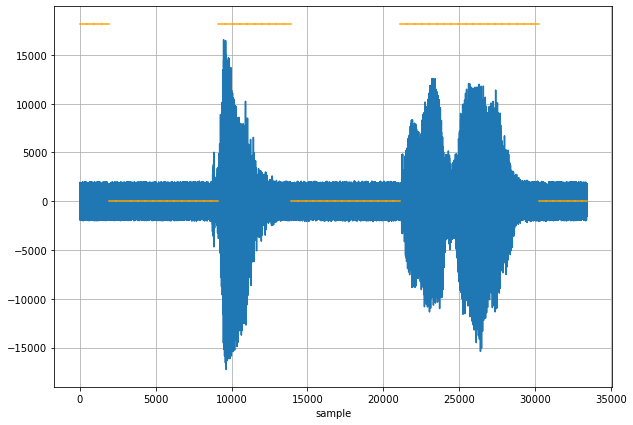

In [105]:
from scipy.io import wavfile
sample_rate, samples = wavfile.read('123.wav')
print(samples.shape,max(samples),min(samples))
noise = np.random.randint(-2000,2000,size=len(samples))
samples = samples + noise
# print(raw_samples)
raw_samples = struct.pack("%dh" % len(samples), *samples)
vad = webrtcvad.Vad()
vad.set_mode(3)
window_duration = 0.03
samples_per_window = int(window_duration * sample_rate + 0.4)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample],
                              sample_rate = sample_rate)
#     print(is_speech)
    segments.append(dict(start = start,
                         stop = stop,
                         is_speech = is_speech))
plt.figure(figsize = (10,7))
plt.plot(samples)
ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')
    else:
         plt.plot([ segment['start'], segment['stop'] - 1], [0,0], color = 'orange')
plt.xlabel('sample')
plt.grid()

(33440,) 14991 -15264


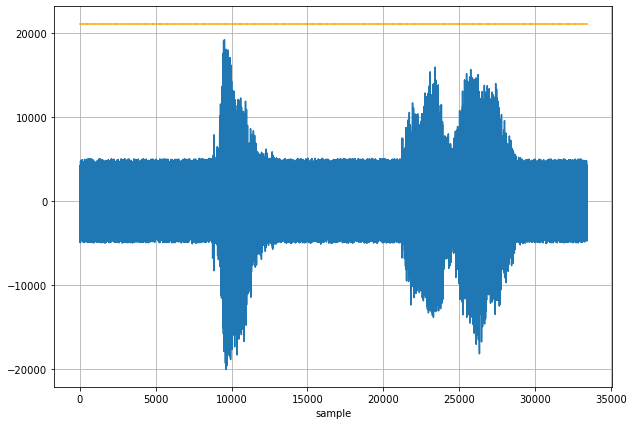

In [108]:
from scipy.io import wavfile
sample_rate, samples = wavfile.read('123.wav')
print(samples.shape,max(samples),min(samples))
noise = np.random.randint(-5000,5000,size=len(samples))
samples = samples + noise
# print(raw_samples)
raw_samples = struct.pack("%dh" % len(samples), *samples)
vad = webrtcvad.Vad()
vad.set_mode(3)
window_duration = 0.03
samples_per_window = int(window_duration * sample_rate + 0.4)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample],
                              sample_rate = sample_rate)
#     print(is_speech)
    segments.append(dict(start = start,
                         stop = stop,
                         is_speech = is_speech))
plt.figure(figsize = (10,7))
plt.plot(samples)
ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')
    else:
         plt.plot([ segment['start'], segment['stop'] - 1], [0,0], color = 'orange')
plt.xlabel('sample')
plt.grid()

### next step: